In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 26_12_2022 07_33_23.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 29_09_2022 02_33_00.xlsx')

In [5]:
filtrado = dados[['Competencia Internacao','Houve internacao','Classificacao final','Faixa Etaria','Idade']]
filtrado = filtrado.dropna()
filtrado

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,30-39 anos,32.0
1,2020_01,Sim,SRAG não especificado,70-79 anos,72.0
2,2020_02,Sim,SRAG não especificado,50-59 anos,59.0
3,2020_01,Sim,SRAG não especificado,70-79 anos,79.0
4,2020_01,Sim,SRAG não especificado,80 e mais anos,93.0
...,...,...,...,...,...
186518,2022_09,Sim,SRAG não especificado,40-49 anos,46.0
186519,2022_12,Sim,COVID-19,50-59 anos,50.0
186520,2022_12,Sim,COVID-19,80 e mais anos,85.0
186521,2022_12,Sim,COVID-19,40-49 anos,43.0


In [6]:
filtrado['Idade'] = filtrado['Idade'].astype(int)
filtrado.head(20)

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
0,2020_01,Sim,SRAG não especificado,30-39 anos,32
1,2020_01,Sim,SRAG não especificado,70-79 anos,72
2,2020_02,Sim,SRAG não especificado,50-59 anos,59
3,2020_01,Sim,SRAG não especificado,70-79 anos,79
4,2020_01,Sim,SRAG não especificado,80 e mais anos,93
5,2020_01,Sim,SRAG por outro vírus resp,0-9 anos,0
6,2020_02,Sim,SRAG não especificado,0-9 anos,3
7,2020_02,Sim,SRAG não especificado,80 e mais anos,87
8,2020_01,Sim,SRAG não especificado,20-29 anos,22
9,2020_01,Sim,SRAG não especificado,60-69 anos,60


In [7]:
for index, idade in filtrado.iterrows():
    if idade['Idade'] < 12:
        filtrado.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtrado.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtrado.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtrado.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtrado.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtrado.loc[index,'Idade'] = '80 e mais'

In [8]:
filtrado = filtrado.loc[filtrado['Houve internacao']=='Sim']
filtrado = filtrado.loc[filtrado['Classificacao final']=='COVID-19']
filtrado.head()

,Competencia Internacao,Houve internacao,Classificacao final,Faixa Etaria,Idade
131,2020_03,Sim,COVID-19,80 e mais anos,80 e mais
132,2020_03,Sim,COVID-19,50-59 anos,40-59 anos
149,2020_03,Sim,COVID-19,30-39 anos,20-39 anos
158,2020_03,Sim,COVID-19,30-39 anos,20-39 anos
177,2020_03,Sim,COVID-19,80 e mais anos,80 e mais


In [9]:
totalHospitalizacoes = filtrado.groupby('Competencia Internacao').count()
totalHospitalizacoes = totalHospitalizacoes.drop('2020_03')
totalHospitalizacoes.head()

,Houve internacao,Classificacao final,Faixa Etaria,Idade
Competencia Internacao,,,,
2020_04,596,596,596,596
2020_05,1103,1103,1103,1103
2020_06,2442,2442,2442,2442
2020_07,4891,4891,4891,4891
2020_08,5230,5230,5230,5230


In [10]:
separaIdade = filtrado.groupby(['Idade','Competencia Internacao']).count()
separaIdade.head(20)

Houve internacao  Classificacao final  \
Idade     Competencia Internacao                                          
0-11 anos 2020_03                                4                    4   
          2020_04                                7                    7   
          2020_05                                7                    7   
          2020_06                               19                   19   
          2020_07                               42                   42   
          2020_08                               63                   63   
          2020_09                               20                   20   
          2020_10                               26                   26   
          2020_11                               37                   37   
          2020_12                               43                   43   
          2021_01                               33                   33   
          2021_02                               44                   44   
          2021_03                               79                   79   
          2021_04                               52                   52   
          2021_05                               52                   52   
          2021_06                               55                   55   
          2021_07                               50                   50   
          2021_08                               23                   23   
          2021_09                               19                   19   
          2021_10                               35                   35   

                                  Faixa Etaria  
Idade     Competencia Internacao                
0-11 anos 2020_03                            4  
          2020_04                            7  
          2020_05                            7  
          2020_06                           19  
          2020_07                           42  
          2020_08                           63  
          2020_09                           20  
          2020_10                           26  
          2020_11                           37  
          2020_12                           43  
          2021_01                           33  
          2021_02                           44  
          2021_03                           79  
          2021_04                           52  
          2021_05                           52  
          2021_06                           55  
          2021_07                           50  
          2021_08                           23  
          2021_09                           19  
          2021_10                           35

In [11]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Internacao')
idade11['Proporcao'] = idade11['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade11 = idade11.drop(['2020_03'])
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Internacao
2022_05     5.251142
2022_06     6.584362
2022_07     7.675906
2022_08     6.129032
2022_09     9.174312
2022_10    13.157895
2022_11     6.855792
2022_12     6.334232
Name: Proporcao, dtype: float64

In [12]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Internacao')
idade19['Proporcao'] = idade19['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade19 = idade19.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Internacao
2022_05    1.065449
2022_06    0.685871
2022_07    1.350391
2022_08    1.720430
2022_09    0.611621
2022_10    0.000000
2022_11    1.182033
2022_12    1.347709
Name: Proporcao, dtype: float64

In [13]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Internacao')
idade39['Proporcao'] = idade39['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade39 = idade39.merge(totalHospitalizacoes,how='outer',right_index=True, left_index=True)
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39.drop(['2020_03'])
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Internacao
2022_05    6.240487
2022_06    5.144033
2022_07    6.894101
2022_08    5.591398
2022_09    3.669725
2022_10    7.894737
2022_11    6.382979
2022_12    7.547170
Name: Proporcao, dtype: float64

In [14]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Internacao')
idade59['Proporcao'] = idade59['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade59 = idade59.drop(['2020_03'])
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Internacao
2022_05    12.252664
2022_06    13.031550
2022_07    13.219616
2022_08    12.150538
2022_09    13.149847
2022_10    16.447368
2022_11    13.475177
2022_12    13.342318
Name: Proporcao, dtype: float64

In [15]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Internacao')
idade79['Proporcao'] = idade79['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade79 = idade79.drop(['2020_03'])
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Internacao
2022_05    42.694064
2022_06    40.946502
2022_07    39.729922
2022_08    41.827957
2022_09    39.143731
2022_10    34.868421
2022_11    43.498818
2022_12    43.126685
Name: Proporcao, dtype: float64

In [16]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Internacao')
idade80['Proporcao'] = idade80['Houve internacao']/totalHospitalizacoes['Houve internacao']*100
idade80 = idade80.drop(['2020_03'])
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Internacao
2022_05    32.496195
2022_06    33.607682
2022_07    31.130064
2022_08    32.580645
2022_09    34.250765
2022_10    27.631579
2022_11    28.605201
2022_12    28.301887
Name: Proporcao, dtype: float64

In [17]:
np.size(idade39)

33

In [18]:
competencia = idade80.to_frame()
competencia = competencia.reset_index()
competencia = competencia['Competencia Internacao']
competencia.tail()

28    2022_08
29    2022_09
30    2022_10
31    2022_11
32    2022_12
Name: Competencia Internacao, dtype: object

In [19]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [20]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 26_12_2022'

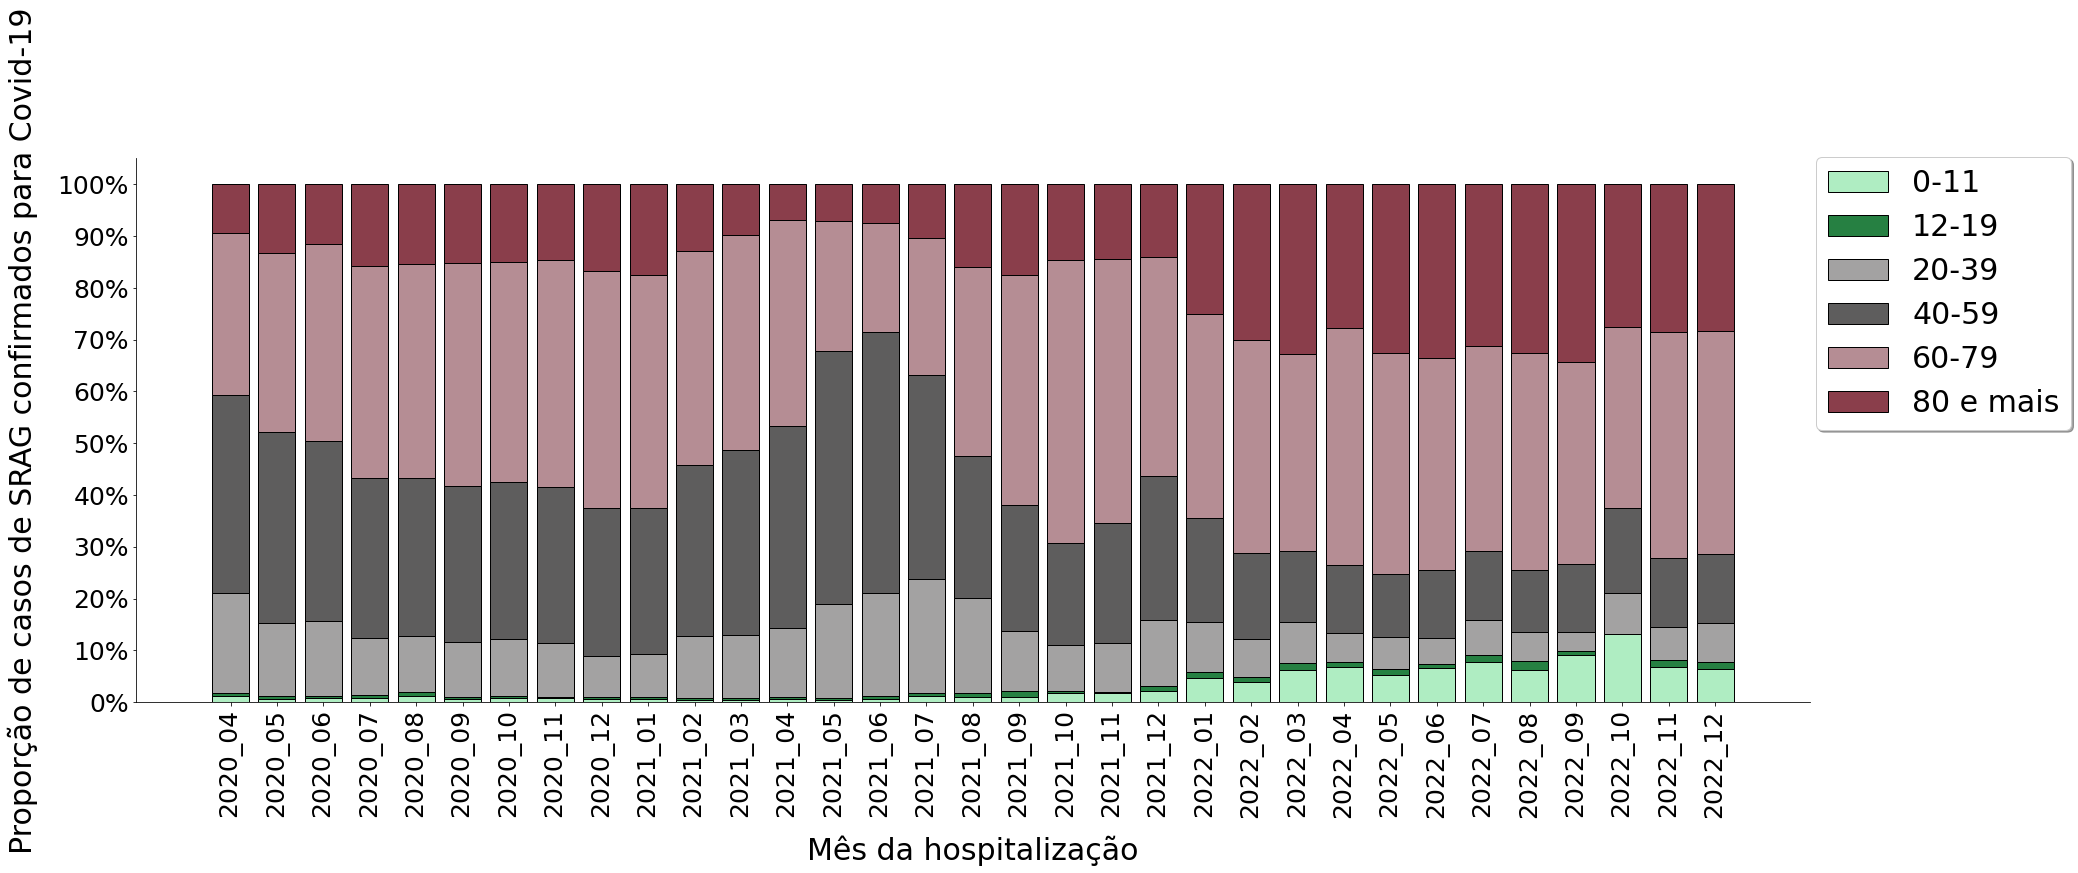

In [21]:
plt.figure(figsize=(30,10))
plt.bar(competencia,idade11, color='#afedc2',edgecolor='#000000')
plt.bar(competencia,idade19, bottom=idade11, color="#268042",edgecolor='#000000')
plt.bar(competencia,idade39, bottom=idade11 + idade19, color='#a3a2a2',edgecolor='#000000')
plt.bar(competencia,idade59, bottom=idade11 + idade19 + idade39, color='#5e5d5d',edgecolor='#000000')
plt.bar(competencia,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#b58d94',edgecolor='#000000')
plt.bar(competencia,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#8a3e4b',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês da hospitalização',fontsize=30,labelpad=18)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de casos de SRAG confirmados para Covid-19',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/SRAGConfirmado_Covid.jpeg',dpi=720,bbox_inches='tight')

In [22]:
totalHospitalizacoes

,Houve internacao,Classificacao final,Faixa Etaria,Idade
Competencia Internacao,,,,
2020_04,596,596,596,596
2020_05,1103,1103,1103,1103
2020_06,2442,2442,2442,2442
2020_07,4891,4891,4891,4891
2020_08,5230,5230,5230,5230
2020_09,3802,3802,3802,3802
2020_10,3475,3475,3475,3475
2020_11,5221,5221,5221,5221
2020_12,6471,6471,6471,6471


In [23]:
teste_obitos_total = totalHospitalizacoes['Classificacao final'].sum()
teste_obitos_total

128692